# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках.

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
from numpy.linalg import inv
from sklearn.metrics import mean_absolute_error, mean_squared_error

class LeastSquaresRegression():
  def fit(self, X, y):
    X = np.column_stack((X, np.ones(X.shape[0]).astype(float)))
    self.w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return self

  def predict(self, X):
    X = np.column_stack((X, np.ones(X.shape[0]).astype(float)))
    return np.dot(X, self.w)

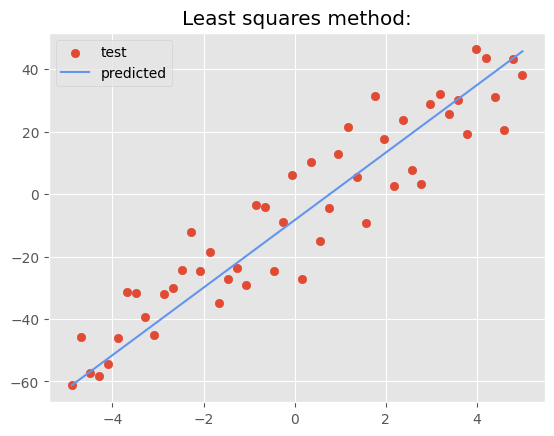

MAE = 9.134229955178096
MSE = 120.81030213690718


In [ ]:
y_predicted = LeastSquaresRegression().fit(X_train, y_train).predict(X_test)

plt.title("Least squares method:")
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_predicted, c='cornflowerblue', label='predicted')
plt.legend(loc='best')
plt.show()

mae = mean_absolute_error(y_predicted, y_test)
mse = mean_squared_error(y_predicted, y_test)

print(f"MAE = {mae}\nMSE = {mse}")

In [ ]:
y_train.shape

(50,)

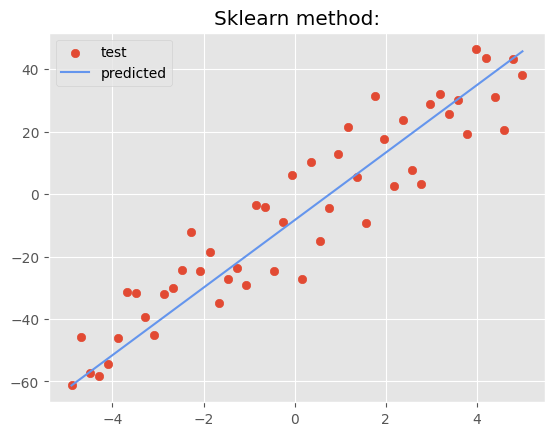

MAE = 9.13422995517809
MSE = 120.81030213690708


In [ ]:
from sklearn.linear_model import LinearRegression
y_predicted = LinearRegression().fit(X_train, y_train).predict(X_test)

plt.title("Sklearn method:")
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_predicted, c='cornflowerblue', label='predicted')
plt.legend(loc='best')
plt.show()

mae = mean_absolute_error(y_predicted, y_test)
mse = mean_squared_error(y_predicted, y_test)

print(f"MAE = {mae}\nMSE = {mse}")

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

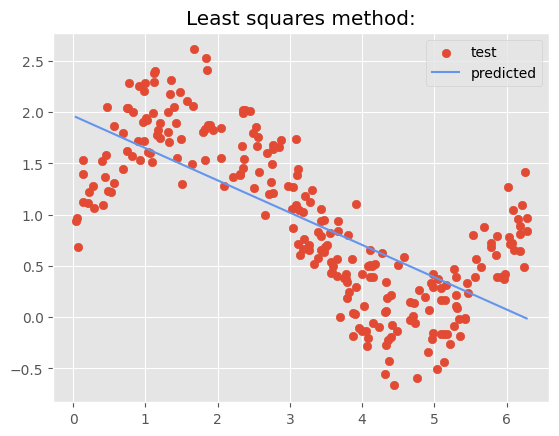

MAE = 0.43322194604147396
MSE = 0.27764108459173564


In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

y_predicted = LeastSquaresRegression().fit(data['x_train'], data['y_train']).predict(data['x_train'])

plt.title("Least squares method:")
plt.scatter(data['x_train'], data['y_train'], label='test')
plt.plot(data['x_train'], y_predicted, c='cornflowerblue', label='predicted')
plt.legend(loc='best')
plt.show()

mae = mean_absolute_error(y_predicted, data['y_train'])
mse = mean_squared_error(y_predicted, data['y_train'])

print(f"MAE = {mae}\nMSE = {mse}")

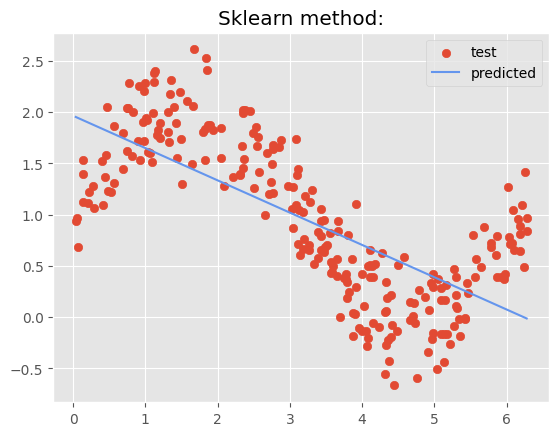

MAE = 0.43322194604147407
MSE = 0.27764108459173564


In [ ]:
y_predicted = LinearRegression().fit(data['x_train'].reshape(-1, 1), data['y_train']).predict(data['x_train'].reshape(-1, 1))

plt.title("Sklearn method:")
plt.scatter(data['x_train'], data['y_train'], label='test')
plt.plot(data['x_train'], y_predicted, c='cornflowerblue', label='predicted')
plt.legend(loc='best')
plt.show()

mae = mean_absolute_error(y_predicted, data['y_train'])
mse = mean_squared_error(y_predicted, data['y_train'])

print(f"MAE = {mae}\nMSE = {mse}")

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \widehat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$

## Задание 3.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
### Полином какой степени подходит больше других? Почему?

class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree

    def fit(self, X, y):
        X = self._vandermonde_matrix(X)

        self.w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        return self

    def predict(self, X):
        X_test = self._vandermonde_matrix(X)
        return np.dot(X_test, self.w)

    def _vandermonde_matrix(self, x):
        X = np.ones((len(x), self.degree + 1))

        for i in range(self.degree + 1):
            X[:, i] = x ** i

        return X

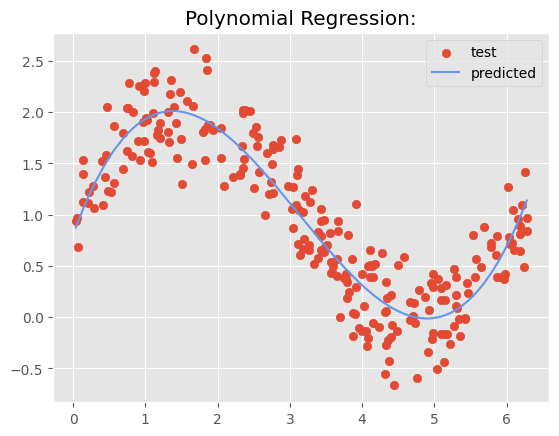

MAE = 0.24619342424663634
MSE = 0.08789085981780927


In [ ]:
y_predicted = PolynomialRegression(4).fit(data['x_train'], data['y_train']).predict(data['x_train'])

plt.title("Polynomial Regression:")
plt.scatter(data['x_train'], data['y_train'], label='test')
plt.plot(data['x_train'], y_predicted, c='cornflowerblue', label='predicted')
plt.legend(loc='best')
plt.show()

mae = mean_absolute_error(y_predicted, data['y_train'])
mse = mean_squared_error(y_predicted, data['y_train'])

print(f"MAE = {mae}\nMSE = {mse}")

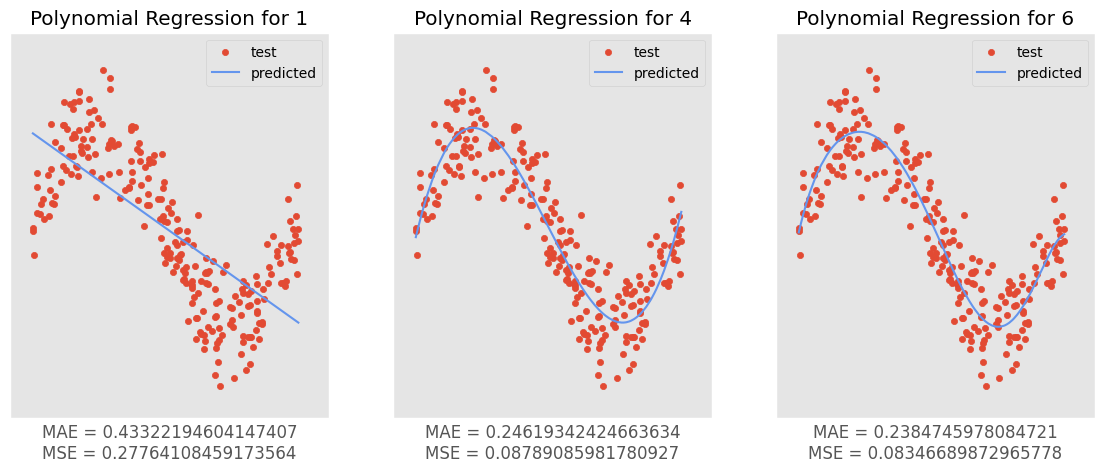

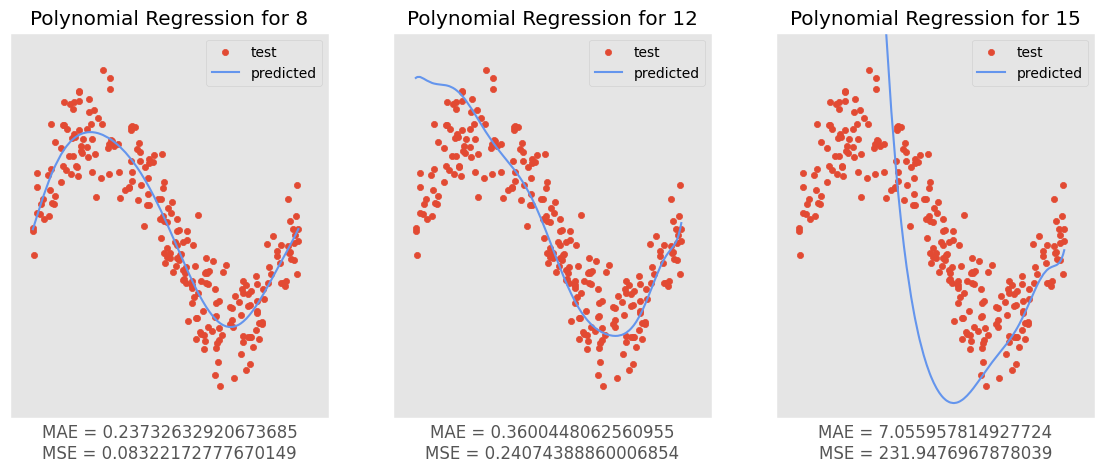

In [ ]:
degrees = [1, 4, 6]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    predict = PolynomialRegression(degrees[i]).fit(data['x_train'], data['y_train']).predict(data['x_train'])
    mae = mean_absolute_error(predict, data['y_train'])
    mse = mean_squared_error(predict, data['y_train'])

    plt.scatter(data['x_train'], data['y_train'], label='test', s=20)
    plt.title(f"Polynomial Regression for {degrees[i]}")
    plt.plot(data['x_train'], predict, c='cornflowerblue', label='predicted')
    plt.xlim((-0.5, 7))
    plt.ylim((-1, 3))
    plt.xlabel(f"MAE = {mae}\nMSE = {mse}")
    plt.legend(loc="best")

plt.show()

degrees = [8, 12, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    predict = PolynomialRegression(degrees[i]).fit(data['x_train'], data['y_train']).predict(data['x_train'])
    mae = mean_absolute_error(predict, data['y_train'])
    mse = mean_squared_error(predict, data['y_train'])

    plt.scatter(data['x_train'], data['y_train'], label='test', s=20)
    plt.title(f"Polynomial Regression for {degrees[i]}")
    plt.plot(data['x_train'], predict, c='cornflowerblue', label='predicted')
    plt.xlim((-0.5, 7))
    plt.ylim((-1, 3))
    plt.xlabel(f"MAE = {mae}\nMSE = {mse}")
    plt.legend(loc="best")

plt.show()

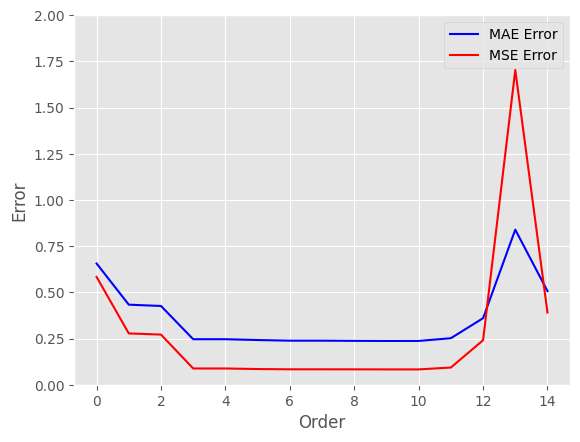

In [ ]:
mae = np.empty(15)
mse = np.empty(15)

for degree in range(15):

    predict = PolynomialRegression(degree).fit(data['x_train'], data['y_train']).predict(data['x_train'])
    mae[degree] = mean_absolute_error(predict, data['y_train'])
    mse[degree] = mean_squared_error(predict, data['y_train'])

plt.plot(np.arange(15), mae, color='blue', label="MAE Error")
plt.plot(np.arange(15), mse, color='red', label = "MSE Error")
plt.ylim((0.0, 2))
plt.ylabel("Error")
plt.xlabel("Order")
plt.legend(loc='best')
plt.show()

Как видно из графиков, нет необходимости в том, чтобы брать наибольшую степень. В нашем случае оптимально взять 4ю степень полинома, так как она дает один из лучших результатов и хорошо показывает вид зависимости на отрезке. С повышением степени полинома наши предсказания все сильнее зависят от шума в данных.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

Возьмите датасет отсюда: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/

**CRIM**: per capita crime rate by town

**ZN**: proportion of residential land zoned for lots
over 25,000 sq.ft.

**INDUS**: proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: nitric oxides concentration (parts per 10 million)
1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Load the Dataset 124

**RM**: average number of rooms per dwelling

**AGE**: proportion of owner-occupied units built prior to 1940

**DIS**: weighted distances to ﬁve Boston employment centers

**RAD**: index of accessibility to radial highways

**TAX**: full-value property-tax rate per $10,000

**PTRATIO**: pupil-teacher ratio by town 12.

**B**: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13.

**LSTAT**: % lower status of the population

**MEDV**: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/housing.csv', header=None, names=column_names, delim_whitespace=True)

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
house_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Выделим целевую переменную и разделим набор данных

target_variable_name = 'MEDV'
training_values = house_data[target_variable_name]
training_points = house_data.drop(target_variable_name, axis=1)
training_points.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [ ]:
scaler = StandardScaler().fit(training_points)
training_points_scaled = scaler.transform(training_points)
linear_regression_model = LinearRegression().fit(training_points_scaled, training_values)

In [ ]:
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])
feature_importance['Название признака'] = training_points.columns
feature_importance['Важность признака'] = np.abs(linear_regression_model.coef_)
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
12,LSTAT,3.743627
7,DIS,3.104044
5,RM,2.674230
8,RAD,2.662218
9,TAX,2.076782
10,PTRATIO,2.060607
4,NOX,2.056718
1,ZN,1.081569
0,CRIM,0.928146
11,B,0.849268


In [ ]:
training_points_most_valuable = training_points.iloc[:, [4, 5, 7, 8, 9, 10, 12]]
training_points_most_valuable

,LSTAT,DIS,RM,RAD,TAX,PTRATIO,NOX
0,4.98,4.0900,6.575,1,296.0,15.3,0.538
1,9.14,4.9671,6.421,2,242.0,17.8,0.469
2,4.03,4.9671,7.185,2,242.0,17.8,0.469
3,2.94,6.0622,6.998,3,222.0,18.7,0.458
4,5.33,6.0622,7.147,3,222.0,18.7,0.458
...,...,...,...,...,...,...,...
501,9.67,2.4786,6.593,1,273.0,21.0,0.573
502,9.08,2.2875,6.120,1,273.0,21.0,0.573
503,5.64,2.1675,6.976,1,273.0,21.0,0.573
504,6.48,2.3889,6.794,1,273.0,21.0,0.573


In [ ]:
# Выделим тренировочную и тестовую выборки и нормализуем данные
X_train, X_test, y_train, y_test = train_test_split(training_points_most_valuable, training_values, train_size=0.7)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

y_predicted = LeastSquaresRegression().fit(X_train, y_train).predict(X_test)
mae = mean_absolute_error(y_predicted, y_test)
mse = mean_squared_error(y_predicted, y_test)

print(f"Для урезанного набора данных:\nMAE = {mae}\nMSE = {mse}")

Для урезанного набора данных:
MAE = 3.577281243847876
MSE = 31.613579960345692


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(training_points, training_values, train_size=0.7)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

y_predicted = LeastSquaresRegression().fit(X_train, y_train).predict(X_test)
mae = mean_absolute_error(y_predicted, y_test)
mse = mean_squared_error(y_predicted, y_test)

print(f"Для полного набора данных:\nMAE = {mae}\nMSE = {mse}")

Для полного набора данных:
MAE = 3.813790300709959
MSE = 28.99714902627249


Можем заметить, что в случае полного набора данных точность нашего прогноза возрастает лишь немного, почти не меняется, ведь в усеченный набор мы взяли самые важные и весомые признаки для рассчета нашей целевой переменной.